In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
cali = pd.read_csv('data/cali_df.csv')

In [3]:
cali.head(1)

,Unnamed: 0,Header,Review,Rating,Date
0,0,"Rude staff, overall enjoyable",generally good of course it would be but i was...,4,2022-05-08


In [4]:
hkjp = pd.read_csv('data/df_cleaned_hk_jp.csv')
hkjp.head(1)

,title,review,rating,date,name
0,A Disney Christmas - Indulge in Disney’s Festi...,christmas is right around the corner and noth...,4,2021-12-30,hk


In [5]:
hkjp.rename({"title":"Header", "review":"Review", "rating":"Rating", "date":"Date"}, axis=1, inplace=True)

In [6]:
df = pd.concat([cali,hkjp])

In [7]:
df.head()

,Unnamed: 0,Header,Review,Rating,Date,name
0,0.0,"Rude staff, overall enjoyable",generally good of course it would be but i was...,4,2022-05-08,NaN
1,1.0,Loved it!,i go to disneyland every couple of years or so...,5,2022-05-06,NaN
2,2.0,Lacking. Changing for the worse.,had a great time here i enjoyed this park bett...,3,2022-05-05,NaN
3,3.0,My first time and I loved it!!,i was at the park the other week and i was on ...,5,2022-05-04,NaN
4,4.0,terreable,we were fortunate enough to take our year old ...,1,2022-05-03,NaN


In [8]:
df.shape

(20875, 6)

In [9]:
df.drop_duplicates(subset=['Header','Review'], keep='first', inplace=True, ignore_index=True)

In [10]:
df.shape

(20875, 6)

In [11]:
df.drop(['Header'], inplace = True, axis=1)

In [12]:
df.shape

(20875, 5)

In [13]:
#df.to_csv('df_combined_cleaned.csv', index=False)

In [14]:
#!pip install spacy
#!pip install -U textblob
#!pip install vaderSentiment
import spacy
import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'spacy'

In [68]:
vader = SentimentIntensityAnalyzer()

In [69]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']
    
def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_neu(text):
    return vader.polarity_scores(text)['neu']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [70]:
vader.polarity_scores(df.Review[0])

{'neg': 0.122, 'neu': 0.681, 'pos': 0.198, 'compound': 0.8648}

In [71]:
df['tb_polarity'] = df.Review.apply(detect_tb_polarity)
df['tb_subjectivity'] = df.Review.apply(detect_tb_subjectivity)
df['vader_pos'] = df.Review.apply(detect_vader_pos)
df['vader_neu'] = df.Review.apply(detect_vader_neu)
df['vader_neg'] = df.Review.apply(detect_vader_neg)
df['vader_comp'] = df.Review.apply(detect_vader_comp)

In [72]:
df.head(10)

,Review,Rating,name,Date,tb_polarity,tb_subjectivity,vader_pos,vader_neu,vader_neg,vader_comp
0,generally good of course it would be but i was...,4,cali,2022-05-08,0.162222,0.624938,0.198,0.681,0.122,0.8648
1,i go to disneyland every couple of years or so...,5,cali,2022-05-06,0.114780,0.372033,0.107,0.878,0.015,0.8978
2,had a great time here i enjoyed this park bett...,3,cali,2022-05-05,0.483333,0.483333,0.379,0.621,0.000,0.9565
3,i was at the park the other week and i was on ...,5,cali,2022-05-04,0.043750,0.443750,0.000,0.877,0.123,-0.7425
4,we were fortunate enough to take our year old ...,1,cali,2022-05-03,0.151640,0.582963,0.107,0.790,0.103,0.0479
5,it was my first time last sunday at disneyland...,3,cali,2022-05-02,0.041246,0.471336,0.081,0.838,0.081,-0.2592
6,we had a really good time there but there were...,1,cali,2022-04-28,0.087433,0.522213,0.104,0.794,0.101,0.4442
7,fun fun fun it is really the happiest place on...,3,cali,2022-04-28,0.350000,0.404167,0.504,0.496,0.000,0.9600
8,old dated all the good rides keep breaking dow...,1,cali,2022-04-24,-0.013833,0.547630,0.128,0.753,0.119,0.3592
9,the last time i was at disney was and i used t...,2,cali,2022-04-23,0.070826,0.409637,0.127,0.810,0.063,0.9885


### Rating based on review score

positive sentiment: review rating > 3\
negative sentiment: review rating <= 3

In [73]:
df['Review_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else'Negative')
df.head(5)

,Review,Rating,name,Date,tb_polarity,tb_subjectivity,vader_pos,vader_neu,vader_neg,vader_comp,Review_Rating
0,generally good of course it would be but i was...,4,cali,2022-05-08,0.162222,0.624938,0.198,0.681,0.122,0.8648,Positive
1,i go to disneyland every couple of years or so...,5,cali,2022-05-06,0.114780,0.372033,0.107,0.878,0.015,0.8978,Positive
2,had a great time here i enjoyed this park bett...,3,cali,2022-05-05,0.483333,0.483333,0.379,0.621,0.000,0.9565,Negative
3,i was at the park the other week and i was on ...,5,cali,2022-05-04,0.043750,0.443750,0.000,0.877,0.123,-0.7425,Positive
4,we were fortunate enough to take our year old ...,1,cali,2022-05-03,0.151640,0.582963,0.107,0.790,0.103,0.0479,Negative


[Text(0.5, 0, 'Location')]

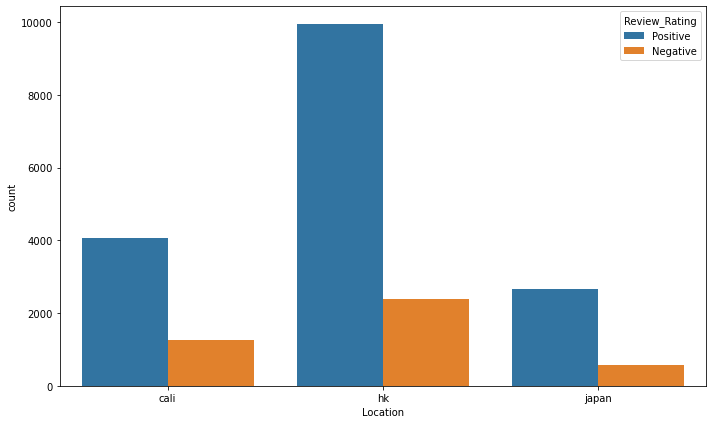

In [74]:
plt.figure(figsize=(10,6))
a = sns.countplot(data=df, x='name', hue='Review_Rating')
a.set(xlabel='Location')

In [75]:
ratio_all = pd.DataFrame(df.Review_Rating.value_counts())
ratio_all
ratio_all.loc['Total'] = ratio_all.sum(numeric_only=True, axis=0)
ratio_all.insert(1, "%", round(ratio_all.iloc[:,0]/ratio_all.iloc[:,0].Total*100,2), True)
ratio_all

,Review_Rating,%
Positive,16662,79.82
Negative,4213,20.18
Total,20875,100.00


In [76]:
ratio_jp = pd.DataFrame(df[df.name == "japan"].Review_Rating.value_counts())
ratio_jp
ratio_jp.loc['Total'] = ratio_jp.sum(numeric_only=True, axis=0)
ratio_jp.insert(1, "%", round(ratio_jp.iloc[:,0]/ratio_jp.iloc[:,0].Total*100,2), True)
ratio_jp

,Review_Rating,%
Positive,2661,82.38
Negative,569,17.62
Total,3230,100.00


In [77]:
ratio_hk = pd.DataFrame(df[df.name == "hk"].Review_Rating.value_counts())
ratio_hk
ratio_hk.loc['Total'] = ratio_hk.sum(numeric_only=True, axis=0)
ratio_hk.insert(1, "%", round(ratio_hk.iloc[:,0]/ratio_hk.iloc[:,0].Total*100,2), True)
ratio_hk

,Review_Rating,%
Positive,9932,80.67
Negative,2380,19.33
Total,12312,100.00


In [78]:
ratio_cali = pd.DataFrame(df[df.name == "cali"].Review_Rating.value_counts())
ratio_cali
ratio_cali.loc['Total'] = ratio_cali.sum(numeric_only=True, axis=0)
ratio_cali.insert(1, "%", round(ratio_cali.iloc[:,0]/ratio_cali.iloc[:,0].Total*100,2), True)
ratio_cali

,Review_Rating,%
Positive,4069,76.3
Negative,1264,23.7
Total,5333,100.0


In [79]:
ratio_df = pd.concat([ratio_all["%"],ratio_jp["%"],ratio_hk["%"],ratio_cali["%"]], axis=1)

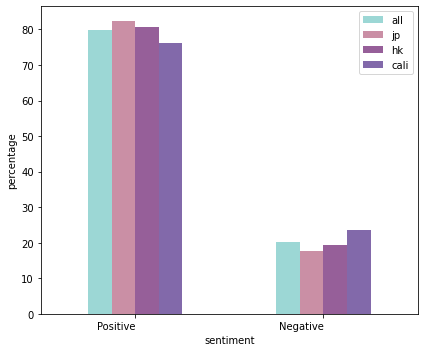

In [80]:
plt.rcParams["figure.figsize"] = [6, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ratio_df[0:2].plot(ax=ax, kind='bar', xlabel='sentiment', ylabel='percentage', color = {"#9cd7d5","#ca8fa5","#8269aa","#965f99"}
)
plt.legend(['all', 'jp', 'hk', 'cali']);
plt.xticks(rotation=0, ha='right')
plt.show()

### Vader Compound Rating

positive sentiment: compound score >= 0.05 \
negative sentiment: compound score < 0.05

In [81]:
df['Vader_Rating'] = df['vader_comp'].apply(lambda x: 'Positive' if x >= 0.05 else 'Negative')

df.head()

,Review,Rating,name,Date,tb_polarity,tb_subjectivity,vader_pos,vader_neu,vader_neg,vader_comp,Review_Rating,Vader_Rating
0,generally good of course it would be but i was...,4,cali,2022-05-08,0.162222,0.624938,0.198,0.681,0.122,0.8648,Positive,Positive
1,i go to disneyland every couple of years or so...,5,cali,2022-05-06,0.114780,0.372033,0.107,0.878,0.015,0.8978,Positive,Positive
2,had a great time here i enjoyed this park bett...,3,cali,2022-05-05,0.483333,0.483333,0.379,0.621,0.000,0.9565,Negative,Positive
3,i was at the park the other week and i was on ...,5,cali,2022-05-04,0.043750,0.443750,0.000,0.877,0.123,-0.7425,Positive,Negative
4,we were fortunate enough to take our year old ...,1,cali,2022-05-03,0.151640,0.582963,0.107,0.790,0.103,0.0479,Negative,Negative


[Text(0.5, 0, 'Location')]

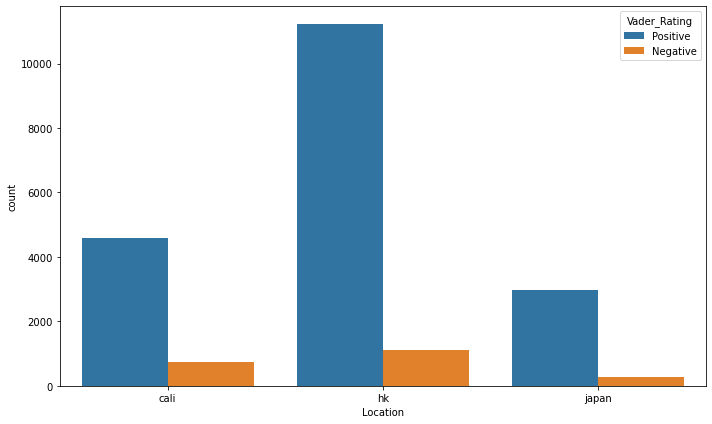

In [82]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='name', hue='Vader_Rating')
ax.set(xlabel='Location')

In [83]:
ratio_all = pd.DataFrame(df.Vader_Rating.value_counts())
ratio_all
ratio_all.loc['Total'] = ratio_all.sum(numeric_only=True, axis=0)
ratio_all.insert(1, "%", round(ratio_all.iloc[:,0]/ratio_all.iloc[:,0].Total*100,2), True)
ratio_all

,Vader_Rating,%
Positive,18783,89.98
Negative,2092,10.02
Total,20875,100.00


In [84]:
ratio_jp = pd.DataFrame(df[df.name == "japan"].Vader_Rating.value_counts())
ratio_jp
ratio_jp.loc['Total'] = ratio_jp.sum(numeric_only=True, axis=0)
ratio_jp.insert(1, "%", round(ratio_jp.iloc[:,0]/ratio_jp.iloc[:,0].Total*100,2), True)
ratio_jp

,Vader_Rating,%
Positive,2972,92.01
Negative,258,7.99
Total,3230,100.00


In [85]:
ratio_hk = pd.DataFrame(df[df.name == "hk"].Vader_Rating.value_counts())
ratio_hk
ratio_hk.loc['Total'] = ratio_hk.sum(numeric_only=True, axis=0)
ratio_hk.insert(1, "%", round(ratio_hk.iloc[:,0]/ratio_hk.iloc[:,0].Total*100,2), True)
ratio_hk

,Vader_Rating,%
Positive,11215,91.09
Negative,1097,8.91
Total,12312,100.00


In [86]:
ratio_cali = pd.DataFrame(df[df.name == "cali"].Vader_Rating.value_counts())
ratio_cali
ratio_cali.loc['Total'] = ratio_cali.sum(numeric_only=True, axis=0)
ratio_cali.insert(1, "%", round(ratio_cali.iloc[:,0]/ratio_cali.iloc[:,0].Total*100,2), True)
ratio_cali

,Vader_Rating,%
Positive,4596,86.18
Negative,737,13.82
Total,5333,100.00


In [87]:
ratio_df = pd.concat([ratio_all["%"],ratio_jp["%"],ratio_hk["%"],ratio_cali["%"]], axis=1)

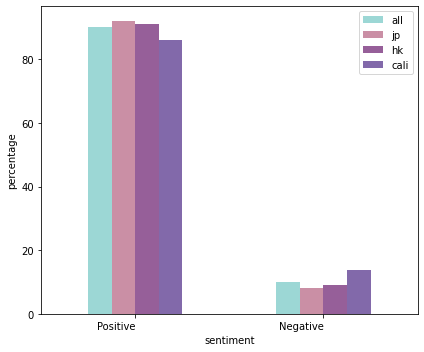

In [88]:
plt.rcParams["figure.figsize"] = [6, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ratio_df[0:2].plot(ax=ax, kind='bar', xlabel='sentiment', ylabel='percentage', color = {"#9cd7d5","#ca8fa5","#8269aa","#965f99"}
)
plt.legend(['all', 'jp', 'hk', 'cali']);
plt.xticks(rotation=0, ha='right')
plt.show()

In [89]:
# add number of characters column
df["n_chars"] = df["Review"].apply(lambda x: len(x))

# add number of words column
df["n_words"] = df["Review"].apply(lambda x: len(x.split(" ")))

In [90]:
df.head(5)

,Review,Rating,name,Date,tb_polarity,tb_subjectivity,vader_pos,vader_neu,vader_neg,vader_comp,Review_Rating,Vader_Rating,n_chars,n_words
0,generally good of course it would be but i was...,4,cali,2022-05-08,0.162222,0.624938,0.198,0.681,0.122,0.8648,Positive,Positive,625,127
1,i go to disneyland every couple of years or so...,5,cali,2022-05-06,0.114780,0.372033,0.107,0.878,0.015,0.8978,Positive,Positive,619,121
2,had a great time here i enjoyed this park bett...,3,cali,2022-05-05,0.483333,0.483333,0.379,0.621,0.000,0.9565,Negative,Positive,137,35
3,i was at the park the other week and i was on ...,5,cali,2022-05-04,0.043750,0.443750,0.000,0.877,0.123,-0.7425,Positive,Negative,252,56
4,we were fortunate enough to take our year old ...,1,cali,2022-05-03,0.151640,0.582963,0.107,0.790,0.103,0.0479,Negative,Negative,1247,248


In [91]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Review"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["Review"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([df, doc2vec_df], axis=1)

In [92]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["Review"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [93]:
reviews_df.shape

(20875, 5547)

In [94]:
reviews_df['R_Rating'] = reviews_df['Review_Rating'].apply(lambda x: 1 if x == "Positive" else 0)

In [95]:
cali = reviews_df[reviews_df.name == "cali"]
hk = reviews_df[reviews_df.name == "hk"]
japan = reviews_df[reviews_df.name == "japan"]

### California data_ Modeling

In [96]:
y = cali["R_Rating"]
X = cali.drop(["R_Rating","Vader_Rating","Review_Rating", "Review", "name", "Date", "Rating"
              ,"tb_polarity","tb_subjectivity","vader_pos","vader_neu","vader_neg","vader_comp"], axis=1)

In [97]:
X.head(5)

,n_chars,n_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_ability,word_abit,word_able,...,word_youtube,word_yr,word_yrs,word_yum,word_yummy,word_zealand,word_zero,word_zone,word_zones,word_zoo
0,625,127,-0.193957,-0.547246,0.193761,0.111888,0.785541,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,619,121,-0.561285,-0.453318,0.035378,0.325572,0.475485,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,137,35,-0.351219,-0.201206,-0.001259,0.216144,0.331469,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,252,56,-0.826096,-0.140306,-0.029197,0.369925,0.142707,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1247,248,-0.481222,-0.535025,-0.482391,0.543418,1.087964,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
X.shape

(5333, 5535)

In [99]:
# split the data into train and test
from sklearn.model_selection import train_test_split

#80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SMOTE

In [100]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

#undersampling
under = RandomUnderSampler(sampling_strategy=0.5,random_state= 42)
X_train, y_train = under.fit_resample(X_train, y_train)
steps = [('under', under)]
pipeline = Pipeline(steps=steps)

In [101]:
X_train,y_train  = pipeline.fit_resample(X_train,y_train)

In [102]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [103]:
y_train.value_counts()

1    2020
0    1010
Name: R_Rating, dtype: int64

### Modeling

#### Random Forest

In [107]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [108]:
#testing
print('Precision: %.3f' % precision_score(y_test, rf_pred))
print('Recall: %.3f' % recall_score(y_test, rf_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, rf_pred))
print('F1 Score: %.3f' % f1_score(y_test, rf_pred))

Precision: 0.836
Recall: 0.952
Accuracy: 0.821
F1 Score: 0.890


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.72      0.40      0.52       254
           1       0.84      0.95      0.89       813

    accuracy                           0.82      1067
   macro avg       0.78      0.68      0.70      1067
weighted avg       0.81      0.82      0.80      1067



#### XGBoost

In [110]:
import xgboost as xgb
from xgboost import XGBClassifier

xg = XGBClassifier(objective= 'binary:logistic', n_estimators = 100, random_state = 42)
xg.fit(X_train, y_train)
xg_pred = xg.predict(X_test)

In [111]:
#testing
print('Precision: %.3f' % precision_score(y_test, xg_pred))
print('Recall: %.3f' % recall_score(y_test, xg_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, xg_pred))
print('F1 Score: %.3f' % f1_score(y_test, xg_pred))

Precision: 0.878
Recall: 0.898
Accuracy: 0.828
F1 Score: 0.888


In [112]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62       254
           1       0.88      0.90      0.89       813

    accuracy                           0.83      1067
   macro avg       0.76      0.75      0.76      1067
weighted avg       0.82      0.83      0.83      1067



#### XGBoost hyperparameter tuning

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

# declare parameters
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [113]:
xgt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

xgt.fit(X_train, y_train)
xgt_pred = xgt.predict(X_test)

In [114]:
#testing
print('Precision: %.3f' % precision_score(y_test, xgt_pred))
print('Recall: %.3f' % recall_score(y_test, xgt_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, xgt_pred))
print('F1 Score: %.3f' % f1_score(y_test, xgt_pred))

Precision: 0.875
Recall: 0.914
Accuracy: 0.835
F1 Score: 0.894


print(classification_report(y_test, xgt_pred))

#feature importance plot
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgt, max_num_features=10)
pyplot.show()

#### Logistic Regression

In [115]:
#Logistic regression classifier
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

lg_pred = lg.predict(X_test)

In [116]:
print('Precision: %.3f' % precision_score(y_test, lg_pred))
print('Recall: %.3f' % recall_score(y_test, lg_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, lg_pred))
print('F1 Score: %.3f' % f1_score(y_test, lg_pred))

Precision: 0.864
Recall: 0.802
Accuracy: 0.753
F1 Score: 0.832


In [117]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53       254
           1       0.86      0.80      0.83       813

    accuracy                           0.75      1067
   macro avg       0.67      0.70      0.68      1067
weighted avg       0.77      0.75      0.76      1067



In [ ]:
rft = RandomForestClassifier(
    n_estimators=70, max_depth=40, max_features=40,
    min_samples_leaf=3, min_samples_split=9,
    bootstrap=False, random_state=42)